# Importowanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from hax.utils.statistics import Statistics
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150

## Pobranie danych

In [2]:
path = "statistics\\DUAL_SIM_RED"
title = "RED"
experiences, actorLosses, criticLosses = Statistics.load(path)
print(len(experiences))
print(len(criticLosses))
print(len(actorLosses))
print()

pathToCompare = "statistics\\DUAL_SIM_BLUE"
titleC = "BLUE"
experiencesC, actorLossesC, criticLossesC = Statistics.load(pathToCompare)

experiencesC = experiencesC[:len(experiences)]
criticLossesC = criticLossesC[:len(criticLosses)]
actorLossesC = actorLossesC[:len(actorLosses)]


1149947
15001
15001



# Wykresy

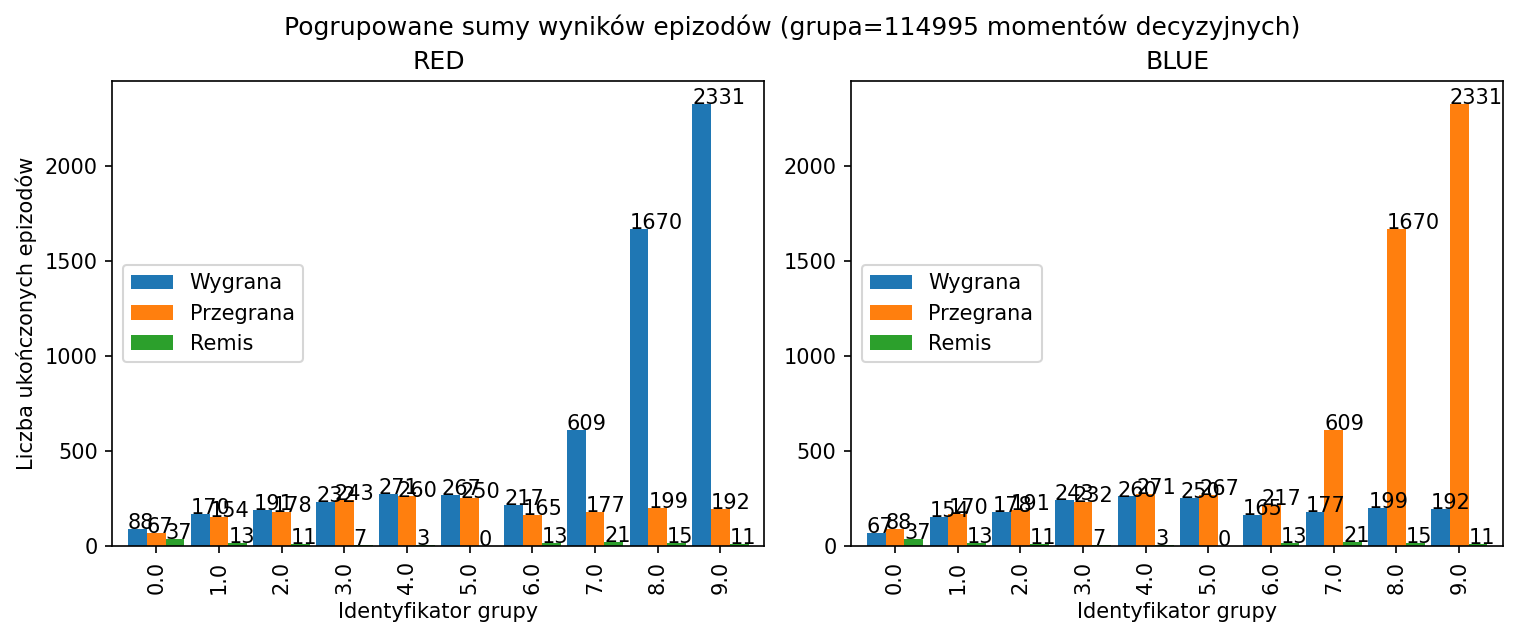

In [3]:
groups = 10
groupSize = experiences.shape[0] / groups
groupSizeC = experiencesC.shape[0] / groups
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
groupedMemoriesC = experiencesC.groupby(experiencesC.index // groupSizeC).sum()
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
fig.suptitle(f"Pogrupowane sumy wyników epizodów (grupa={round(groupSize)} momentów decyzyjnych)", fontsize=12)
fig.tight_layout()
mems = groupedMemories[["win", "lose", "draw"]].plot.bar(ax=axes[0], title=title, width=0.9, xlabel="Identyfikator grupy", ylabel="Liczba ukończonych epizodów")
legend = mems.legend(loc="center left")
legend.get_texts()[0].set_text('Wygrana')
legend.get_texts()[1].set_text('Przegrana')
legend.get_texts()[2].set_text('Remis')

memsC = groupedMemoriesC[["win", "lose", "draw"]].plot.bar(ax=axes[1], title=titleC, width=0.9, xlabel="Identyfikator grupy")
legend = memsC.legend(loc="center left")
legend.get_texts()[0].set_text('Wygrana')
legend.get_texts()[1].set_text('Przegrana')
legend.get_texts()[2].set_text('Remis')
for p in mems.patches:
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.1))
for p in memsC.patches:
    memsC.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.1))

<AxesSubplot:title={'center':'BLUE'}, xlabel='Identifikator sesji uczenia'>

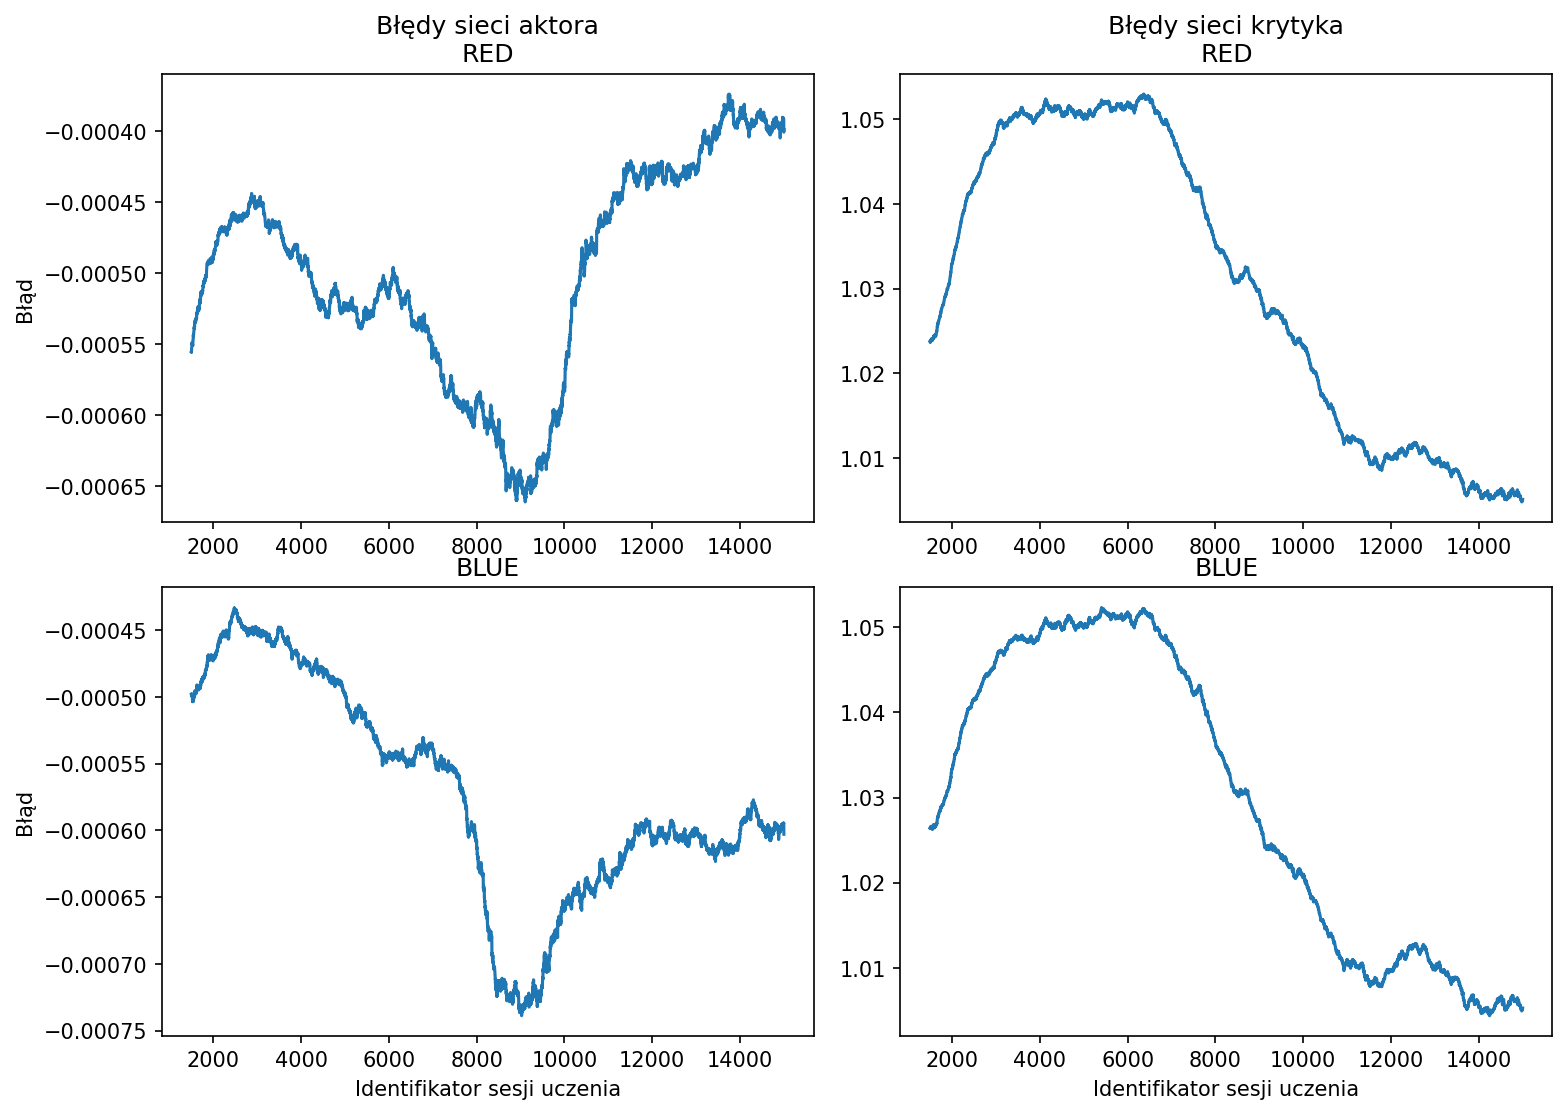

In [4]:
data = actorLosses["loss"]
dataAC = actorLossesC["loss"]

dataAC = dataAC[:len(data)]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
fig.tight_layout()
data.rolling(window=len(data)//10).mean().plot(y="loss", ax=axes[0][0], title="Błędy sieci aktora\n"+title, ylabel="Błąd")
dataAC.rolling(window=len(dataAC)//10).mean().plot(y="loss", ax=axes[1][0], title=titleC, xlabel="Identifikator sesji uczenia", ylabel="Błąd")

data = criticLosses["loss"]
dataAC = criticLossesC["loss"]

dataAC = dataAC[:len(data)]

data.rolling(window=len(data)//10).mean().plot(y="loss", ax=axes[0][1], title="Błędy sieci krytyka\n"+title)
dataAC.rolling(window=len(dataAC)//10).mean().plot(y="loss", ax=axes[1][1], title=titleC, xlabel="Identifikator sesji uczenia")

rew
RED
ballGateTraj    1.785877
toBallTraj      0.211442
dtype: float64
ballGateTraj   -0.025855
toBallTraj     -0.018716
dtype: float64

BLUE
ballGateTraj    0.025855
toBallTraj      0.018716
dtype: float64
ballGateTraj    0.025855
toBallTraj      0.018716
dtype: float64


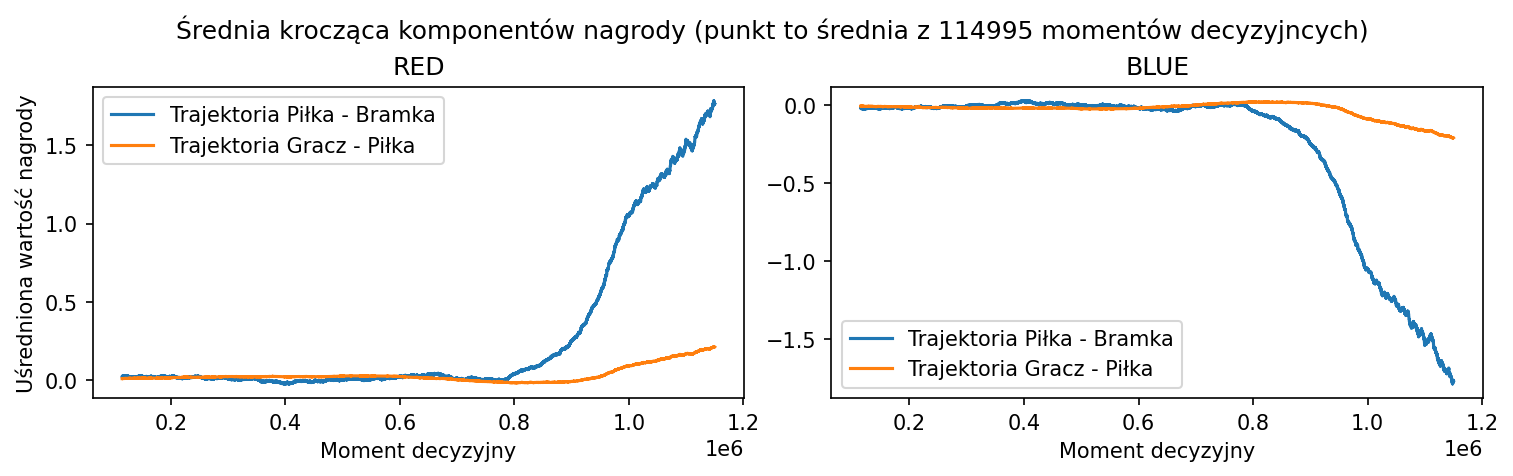

In [5]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
dataC =experiencesC[["ballGateTraj", "toBallTraj"]]
dataC = dataC.dropna()
roll = data.rolling(window=int(groupSize)).mean()
rollC = dataC.rolling(window=int(groupSize)).mean()
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,3))
fig.suptitle(f"Średnia krocząca komponentów nagrody (punkt to średnia z {round(groupSize)} momentów decyzyjncych)")
fig.tight_layout()
rewplt = roll.plot(title=title, ax=axes[0], xlabel="Moment decyzyjny", ylabel=f"Uśredniona wartość nagrody")
rewpltC = rollC.plot(title=titleC, ax=axes[1], xlabel="Moment decyzyjny")

legend=rewplt.legend()
legend.get_texts()[0].set_text('Trajektoria Piłka - Bramka')
legend.get_texts()[1].set_text('Trajektoria Gracz - Piłka')

legend=rewpltC.legend()
legend.get_texts()[0].set_text('Trajektoria Piłka - Bramka')
legend.get_texts()[1].set_text('Trajektoria Gracz - Piłka')
print("rew")
print(title)
print(roll.max())
print(roll.min())
print()
print(titleC)
print(rollC.max())
print(rollC.max())


eplen
RED
0    35.356079
dtype: float64
0    387.080645
dtype: float64

BLUE
0    35.356079
dtype: float64
0    387.080645
dtype: float64


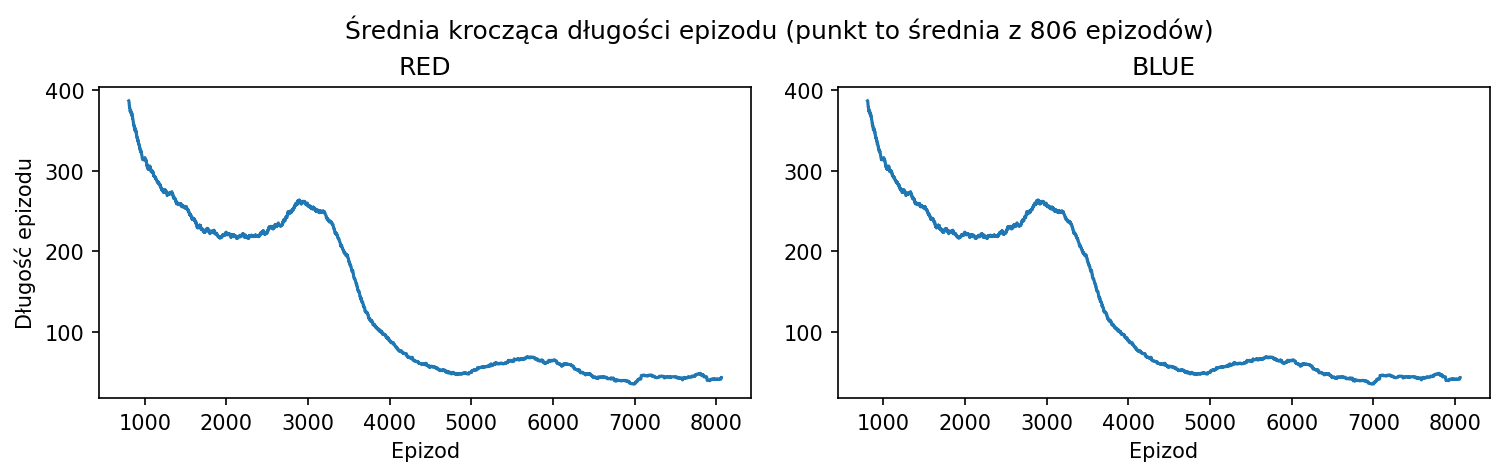

In [6]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengthsC = []
currentEpisodeLength = 1
for row in experiencesC.itertuples():
    if row.done:
        episodeLengthsC.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengthsC.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
episodeLengthsC = pd.DataFrame(episodeLengthsC)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,3))
fig.suptitle(f"Średnia krocząca długości epizodu (punkt to średnia z {len(episodeLengths)//10} epizodów)")
fig.tight_layout()

roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
rollC = episodeLengthsC.rolling(window=len(episodeLengthsC)//10).mean()
roll.plot(title=title, ax=axes[0], legend=None, xlabel="Epizod", ylabel="Długość epizodu")
rollC.plot(title=titleC, ax=axes[1], legend=None, xlabel="Epizod")
print("eplen")
print(title)
print(roll.min())
print(roll.max())
print()
print(titleC)
print(rollC.min())
print(rollC.max())

In [7]:
# MAIN
seconds = 0
stamps  = actorLosses["ts"]
for i in range(len(stamps)):
    if i + 1 == len(stamps):
        break
    
    diff = stamps[i+1] - stamps[i]
    if diff < 60:
        seconds += diff

minutes = seconds / 60
hours = minutes / 60
print(hours)

16.78150768591298


In [8]:
# COMPARED
seconds = 0
stamps  = actorLossesC["ts"][:len(actorLosses)]
for i in range(len(stamps)):
    if i + 1 == len(stamps):
        break
    
    diff = stamps[i+1] - stamps[i]
    if diff < 60:
        seconds += diff

minutes = seconds / 60
hours = minutes / 60
print(hours)

16.78150768591298
